In [91]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [22]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

train.head()
y_train = train['5']
X_train = train.drop(['5'],axis = 1)
y_test = test['7']
X_test = test.drop(['7'],axis = 1)
features = X_train.shape[1]
features

784

In [40]:
new_trainy = to_categorical(y_train)
new_testy = to_categorical(y_test)

In [24]:
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [62]:
trainX = train_norm.to_numpy().reshape((train_norm.shape[0], 28, 28, 1))

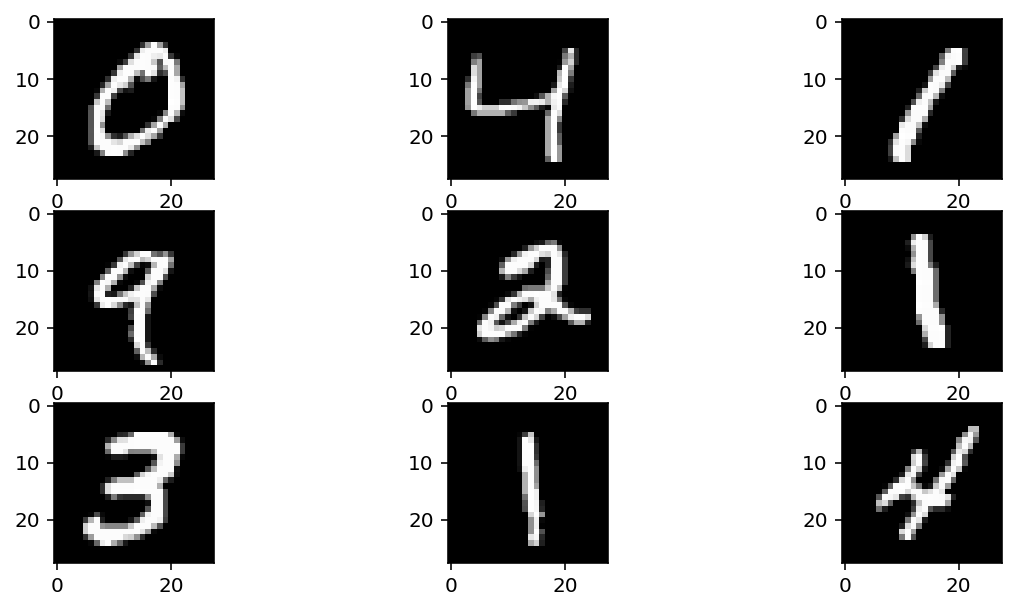

In [76]:
from matplotlib import pyplot
pyplot.figure(figsize = (10,5))
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [48]:
np_Xtrain = train_norm.to_numpy()

Using the VGG architecture of;
    
    input layer / conv layer / conv layer / max pooling layer

In [31]:
def define():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [88]:
np_Xtrain = train_norm.to_numpy().reshape((train_norm.shape[0], 28, 28, 1))
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(np_Xtrain):
    # define model
    model = define()
    # select rows for train and test
    trainX, trainY, testX, testY = np_Xtrain[train_ix], new_trainy[train_ix], np_Xtrain[test_ix], new_trainy[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)
print(histories)
print(scores)

> 98.592
> 98.483
> 98.933
> 98.675
> 98.608
[<keras.callbacks.callbacks.History object at 0x0000022DA1D03488>, <keras.callbacks.callbacks.History object at 0x0000022DA0E3CA48>, <keras.callbacks.callbacks.History object at 0x0000022DA1D87E08>, <keras.callbacks.callbacks.History object at 0x0000022DA7DE6208>, <keras.callbacks.callbacks.History object at 0x0000022DA7F0D4C8>]
[0.9859166741371155, 0.9848333597183228, 0.9893333315849304, 0.9867500066757202, 0.9860821962356567]


C:\Users\91891\Anaconda3\envs\nnenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

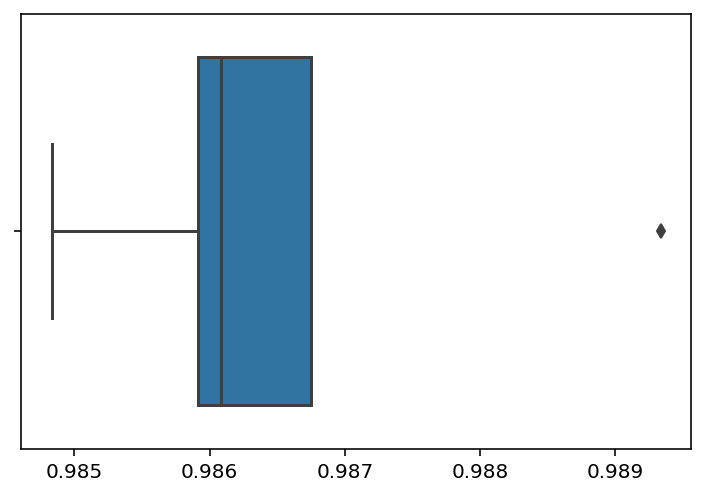

In [89]:
sns.boxplot(scores)

In [90]:
model = define()
model.fit(np_Xtrain,new_trainy, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

In [94]:
img = load_img('sample.png',color_mode = 'grayscale', target_size=(28, 28))
# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

In [97]:
model.predict_classes(img)

array([7], dtype=int64)

BINGO

In [98]:
model.save('final_model.h5')